# Graham Algorithm
When we

In [ ]:
from generate_dots import ranp, fcsvp, cosp
import numpy as np
import matplotlib.pyplot as plt

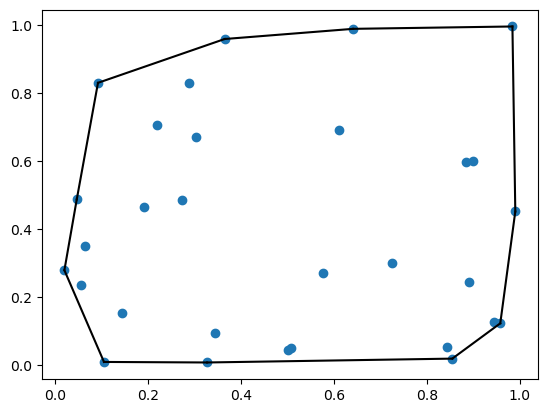

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull


points = np.random.rand(30, 2)
hull = ConvexHull(points)
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

plt.show()